In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/home/harwick/Downloads/owid-covid-data.csv")

In [3]:
df.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.039670e+05,2.037160e+05,2.025340e+05,1.851760e+05,185111.000000,183936.000000,203031.000000,202780.000000,201603.000000,184253.000000,...,132189.000000,130378.000000,85837.000000,155276.000000,198830.000000,170235.000000,7.146000e+03,7146.000000,7189.000000,7146.000000
mean,4.013962e+06,1.260981e+04,1.264241e+04,7.092821e+04,145.575357,146.331197,53198.781213,189.794937,190.090546,655.971237,...,10.657375,32.802881,50.860260,3.084303,73.638607,0.724937,4.567256e+04,9.727418,14.604108,1256.030346
std,2.516857e+07,8.698466e+04,8.504240e+04,3.664585e+05,752.240219,737.698987,96339.543998,947.591415,623.966099,944.012729,...,10.601320,13.534957,31.844017,2.550704,7.447792,0.149700,1.269947e+05,13.746641,26.965277,1668.272255
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,3.729000e+03,0.000000e+00,6.714000e+00,1.060000e+02,0.000000,0.143000,948.036000,0.000000,1.469000,27.346000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.765000e+01,0.260000,-0.280000,11.100572
50%,4.411200e+04,6.200000e+01,1.001430e+02,1.077000e+03,1.000000,1.714000,8847.644000,8.854000,20.209000,192.554000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.321250e+03,7.275000,7.230000,706.249704
75%,4.711910e+05,1.004000e+03,1.158393e+03,9.273000e+03,15.000000,16.857000,64592.749500,102.076000,137.619000,971.906000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.270655e+04,15.360000,20.390000,1969.750062
max,6.021739e+08,4.081689e+06,3.436124e+06,6.490351e+06,17737.000000,14858.143000,655309.333000,195005.313000,35258.843000,6398.991000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354


In [4]:
df.rename(columns={'date':'Date','location':'Country','continent':'Continent'},inplace=True)
print(df.head(5))


  iso_code Continent      Country        Date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN        

In [5]:
continent_names=list(df.Continent.unique())
print(continent_names)

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']


In [6]:
from sklearn.impute  import SimpleImputer
imputer= SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df2)

       iso_code Continent      Country        Date total_cases new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24         5.0       5.0   
1           AFG      Asia  Afghanistan  2020-02-25         5.0       0.0   
2           AFG      Asia  Afghanistan  2020-02-26         5.0       0.0   
3           AFG      Asia  Afghanistan  2020-02-27         5.0       0.0   
4           AFG      Asia  Afghanistan  2020-02-28         5.0       0.0   
...         ...       ...          ...         ...         ...       ...   
212862      ZWE    Africa     Zimbabwe  2022-08-26    256682.0       7.0   
212863      ZWE    Africa     Zimbabwe  2022-08-27    256682.0       0.0   
212864      ZWE    Africa     Zimbabwe  2022-08-28    256699.0      17.0   
212865      ZWE    Africa     Zimbabwe  2022-08-29    256704.0       5.0   
212866      ZWE    Africa     Zimbabwe  2022-08-30    256708.0       4.0   

       new_cases_smoothed   total_deaths     new_deaths new_deaths_smoothed  \
0       

In [7]:
df3 = df2.groupby(['Date','Country'])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()

print(df3)

              Date            Country    total_cases   total_deaths  \
0       2020-01-01          Argentina  missing_value  missing_value   
1       2020-01-01             Mexico  missing_value  missing_value   
2       2020-01-02          Argentina  missing_value  missing_value   
3       2020-01-02             Mexico  missing_value  missing_value   
4       2020-01-03          Argentina  missing_value  missing_value   
...            ...                ...            ...            ...   
212862  2022-08-30  Wallis and Futuna          761.0            7.0   
212863  2022-08-30              World    602173911.0      6490351.0   
212864  2022-08-30              Yemen        11926.0         2155.0   
212865  2022-08-30             Zambia       332822.0         4016.0   
212866  2022-08-30           Zimbabwe       256708.0         5593.0   

       total_vaccinations  
0           missing_value  
1           missing_value  
2           missing_value  
3           missing_value  
4      

In [8]:
#replacing missing value with 0
# covid3['total_cases'].replace({'missing_value':0},inplace=True)
# print(covid3['total_cases'])
# covid3['total_deaths'].replace({'missing_value':0},inplace=True)
# print(covid3['total_deaths'])
# covid3['total_vaccinations'].replace({'missing_value':0},inplace=True)
# print(covid3['total_vaccinations'])
df3['total_cases'].replace({'missing_value':0},inplace=True)
print(df3['total_cases'])
df3['total_deaths'].replace({'missing_value':0},inplace=True)
print(df3['total_deaths'])
df3['total_vaccinations'].replace({'missing_value':0},inplace=True)
print(df3['total_vaccinations'])

0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
             ...     
212862          761.0
212863    602173911.0
212864        11926.0
212865       332822.0
212866       256708.0
Name: total_cases, Length: 212867, dtype: float64
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
            ...    
212862          7.0
212863    6490351.0
212864       2155.0
212865       4016.0
212866       5593.0
Name: total_deaths, Length: 212867, dtype: float64
0         0.000000e+00
1         0.000000e+00
2         0.000000e+00
3         0.000000e+00
4         0.000000e+00
              ...     
212862    0.000000e+00
212863    1.257171e+10
212864    0.000000e+00
212865    0.000000e+00
212866    0.000000e+00
Name: total_vaccinations, Length: 212867, dtype: float64


In [9]:
covid4=df3[df3['total_deaths']>1000000]
countries=covid4['Country'].unique()
print(len(countries))
print(countries)

10
['World' 'High income' 'Upper middle income' 'Europe' 'South America'
 'Asia' 'Lower middle income' 'North America' 'European Union'
 'United States']


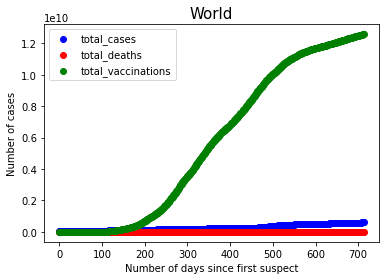

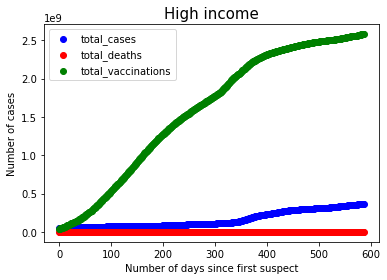

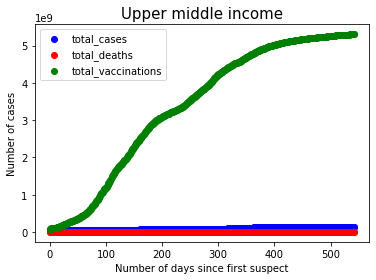

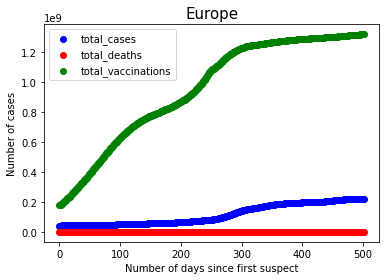

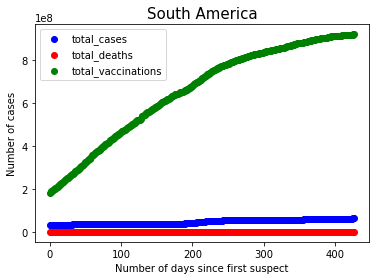

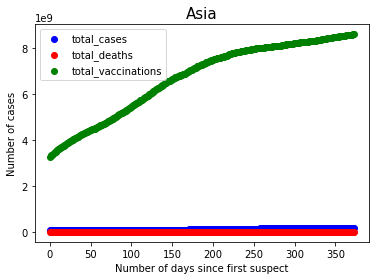

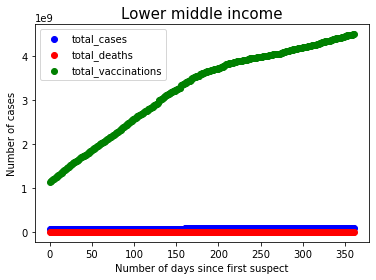

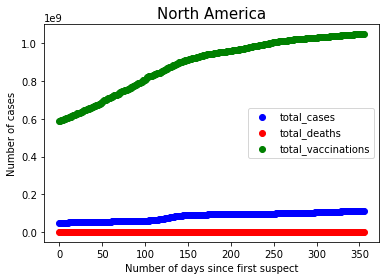

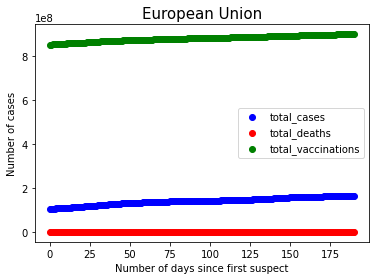

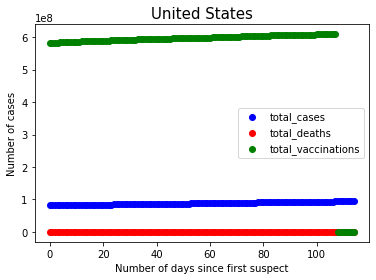

In [10]:
for idx in range (0,len(countries)):
    c=covid4[covid4['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
    plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
    plt.scatter(np.arange(0,len(c)),c['total_vaccinations'],color='green',label="total_vaccinations")
    plt.title(countries[idx],size=15)
    plt.xlabel("Number of days since first suspect")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()


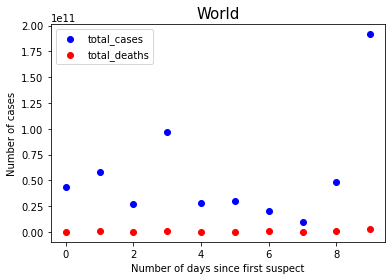

In [11]:
covid5=covid4.groupby(['Country'])[['total_cases','total_deaths']].sum().reset_index()
c=covid5
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
plt.title("World",size=15)
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [12]:
date=covid4['Date'].unique()
print(len(date))

714


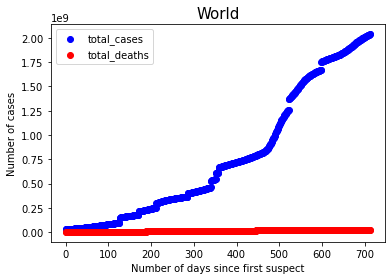

In [13]:
covid6=covid4.groupby(["Date"])[['total_cases','total_deaths']].sum().reset_index()
c=covid6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
plt.title("World",size=15)
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()